# Actividad 2: Comparación de tiempos de ejecución entre algoritmos iterativos y recursivos para 3 problemas generales
###### Alberto Benavides

## Fibonacci

Vamos a empezar por Fibonacci recursivo:

In [135]:
def FibRecursivo(n):
    if n < 2:
        return n
    else:
        return FibRecursivo(n-2) + FibRecursivo(n-1)

Ahora el iterativo de Fibonacci:

In [136]:
def FibIterativo(n):
    a = 0
    b = 1
    for x in range(n - 1):
        t = b
        b = b + a
        a = t
    return b

Ahora comprobamos que funcionen igual. Para ello usaremos algún número $20 < r < 50$ obtenido de una distribución normal aleatoria de la librería [random](https://docs.python.org/3/library/random.html) de Python.

In [137]:
from random import randint

r = randint(20, 30)
FibRecursivo(r) == FibIterativo(r)

True

## Factorial

Ahora, un recursivo de factorial:

In [138]:
def FacRecursivo(n):
    if n > 1:
        return n * FacRecursivo(n - 1)
    else:
        return n

Y el iterativo:

In [139]:
def FacIterativo(n):
    total = 1
    for x in range(n):
        total *= (n - x)
    return total


Y comprobar si es verdad:

In [140]:
r = randint(20, 50)
FacRecursivo(r) == FacIterativo(r)

True

Wow, todo va bien.

## Palíndromo

Por último, se revisará un algoritmo que revisa si una cadena de texto es palíndromo. Primero el recursivo:

In [141]:
def PalRecursivo(s):
    if(len(s) == 0 or len(s) == 1):
        return 1
    elif s[0] != s[-1]:
        return 0
    else:
        return PalRecursivo(str(s[1: -1]))

Y también el iterativo:

In [142]:
def PalIterativo(s):
    if(len(s) == 0 or len(s) == 1):
        return 1
    for x in range(len(s) // 2):
        if s[x] != s[(x + 1) * -1]:
            return 0
    return 1

Para probar que estos algoritmos determinan si las cadenas son palíndromos, se generarán palíndromos aleatorios de longiud $l \times 2$ a partir de la siguiente función:

In [143]:
from string import ascii_lowercase
from random import choice, shuffle

def PalAleatorio(l):
    letras = ascii_lowercase
    pal = ''.join(choice(letras) for i in range(l))
    # https://www.educative.io/edpresso/how-do-you-reverse-a-string-in-python
    pal += pal[::-1]
    # Desordenar cadenas
    '''
    if randint(0, 1) == 1:
        t = list(pal)
        shuffle(t)
        pal = ''.join(t)
    '''
    return pal

Con esto, ya se puede comprobar si el resultado es el mismo:

In [144]:
r = randint(20, 50)
s = PalAleatorio(r)

In [145]:
PalRecursivo(s) == PalIterativo(s)

True

## Experimentación

Ahora se medirán tiempos de ejecución comparando estos tres algoritmos de manera iterativa y recursiva. Primero el algoritmo de Fibonacci:

In [146]:
import timeit

nFib = []
recFib = []
iteFib = []

for x in range(1, 30):
    nFib.append(x)
    if __name__ == '__main__':
        recFib.append(timeit.timeit("FibRecursivo(" + str(x) +")", setup="from __main__ import FibRecursivo", number=1000))
        iteFib.append(timeit.timeit("FibIterativo(" + str(x) +")", setup="from __main__ import FibIterativo", number=1000))

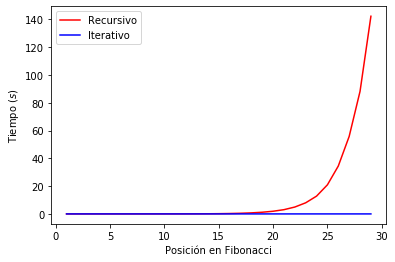

In [147]:
import matplotlib.pyplot as plt

plt.plot(nFib, recFib, c="red", label="Recursivo")
plt.plot(nFib, iteFib, c="blue", label="Iterativo")
plt.xlabel("Posición en Fibonacci")
plt.ylabel("Tiempo ($s$)")
plt.legend()
plt.show()

Se repetirá para el iterativo con muchas más repeticiones, para ver su comportamiento de manera individual:

In [168]:
nFib = []
iteFib = []

for x in range(1, 1000):
    nFib.append(x)
    if __name__ == '__main__':
        iteFib.append(timeit.timeit("FibIterativo(" + str(x) +")", setup="from __main__ import FibIterativo", number=1000))

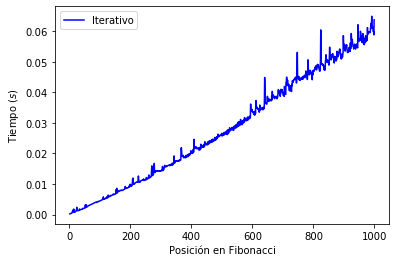

In [169]:
plt.plot(nFib, iteFib, c="blue", label="Iterativo")
plt.xlabel("Posición en Fibonacci")
plt.ylabel("Tiempo ($s$)")
plt.legend()
plt.show()

Ahora el del factorial de un número:

In [159]:
nFac = []
recFac = []
iteFac = []

for x in range(1, 1000):
    nFac.append(x)
    if __name__ == '__main__':
        recFac.append(timeit.timeit("FacRecursivo(" + str(x) +")", setup="from __main__ import FacRecursivo", number=1000))
        iteFac.append(timeit.timeit("FacIterativo(" + str(x) +")", setup="from __main__ import FacIterativo", number=1000))

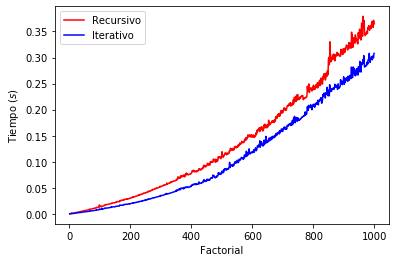

In [163]:
plt.plot(nFac, recFac, c="red", label="Recursivo")
plt.plot(nFac, iteFac, c="blue", label="Iterativo")
plt.xlabel("Factorial")
plt.ylabel("Tiempo ($s$)")
plt.legend()
plt.show()

Por último los palíndromos:

In [185]:
nPal = []
recPal = []
itePal = []

for x in range(1, 100):
    nPal.append(x)
    s = PalAleatorio(x)
    a = %timeit -o -n 1000 PalRecursivo(s)
    recPal.append(a)
    b = %timeit -o -n 1000 PalIterativo(s)
    itePal.append(b)

572 ns ± 227 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
836 ns ± 270 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
803 ns ± 35.9 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
569 ns ± 13 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.33 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
697 ns ± 108 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.63 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
744 ns ± 45.4 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.86 µs ± 89 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
884 ns ± 46.6 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.21 µs ± 44.9 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
963 ns ± 46.1 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.58 µs ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.07 µs ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 1000 loops e

6.1 µs ± 305 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.6 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.95 µs ± 44.6 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.5 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.06 µs ± 254 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
21.8 µs ± 340 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.04 µs ± 99.1 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
22.6 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.15 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
23 µs ± 79.6 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.35 µs ± 83.1 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
22.9 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.36 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
23.8 µs ± 878 ns per loop (mean ± std. dev. of 7 runs, 1000 loo

In [186]:
best = 

99
